### Step 1: Load and Explore the CSV Data

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv(r"C:\Users\jerli\OneDrive\Documents\song recomender\105 songs.csv")

In [31]:
df.head()
df.info()
df['Mood'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          105 non-null    object 
 1   Artist        105 non-null    object 
 2   Energy        105 non-null    float64
 3   Valence       105 non-null    float64
 4   Danceability  105 non-null    float64
 5   Tempo         105 non-null    int64  
 6   Acousticness  105 non-null    float64
 7   Mood          105 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.7+ KB


Mood
Happy        21
Sad          21
Calm         21
Angry        21
Energetic    21
Name: count, dtype: int64

In [32]:
df.isnull().sum()

Name            0
Artist          0
Energy          0
Valence         0
Danceability    0
Tempo           0
Acousticness    0
Mood            0
dtype: int64

In [33]:
df.dropna(inplace=True)  # if very few nulls

###  Step 2: Filter Songs Based on Mood

In [34]:
def get_songs_by_mood(df, mood):
    mood = mood.lower()  # normalize mood for comparison
    return df[df['Mood'].str.lower() == mood][['Name', 'Artist']]

In [35]:
happy_songs = get_songs_by_mood(df, 'Happy')
print(happy_songs)

                       Name               Artist
0                     Happy    Pharrell Williams
1       Walking On Sunshine  Katrina & The Waves
2   Can't Stop the Feeling!    Justin Timberlake
3       Best Day Of My Life     American Authors
4                 Good Life          OneRepublic
5                 I'm Yours           Jason Mraz
6                 Happy Now                 Zedd
7                   Classic                 MKTO
8                     Sugar             Maroon 5
9               Uptown Girl           Billy Joel
10                  Valerie        Amy Winehouse
11             Shake It Off         Taylor Swift
12  I Got You (I Feel Good)          James Brown
13                 Dynamite            Taio Cruz
14                   Havana       Camila Cabello
15      Put Your Records On   Corinne Bailey Rae
16    Pocketful of Sunshine  Natasha Bedingfield
17              Count on Me           Bruno Mars
18              Love On Top              Beyoncé
19             Good 

In [36]:
sad_songs = get_songs_by_mood(df, 'Sad')
print(sad_songs)

                      Name             Artist
21        Someone Like You              Adele
22     When I Was Your Man         Bruno Mars
23              Let Her Go          Passenger
24              All I Want           Kodaline
25                 Jealous           Labrinth
26                    Hurt        Johnny Cash
27               Liability              Lorde
28        The Night We Met         Lord Huron
29  Tears Dry on Their Own      Amy Winehouse
30                 Fix You           Coldplay
31                   Youth           Daughter
32           Say Something  A Great Big World
33             Skinny Love              Birdy
34       Un-break My Heart       Toni Braxton
35              Stone Cold        Demi Lovato
36              Breathe Me                Sia
37               Let It Go          James Bay
38              Hallelujah       Jeff Buckley
39  I Will Always Love You    Whitney Houston
40         Everybody Hurts             R.E.M.
41                 Falling       H

In [37]:
calm_songs = get_songs_by_mood(df, 'Calm')
print(calm_songs)

                          Name                  Artist
42                Sunset Lover           Petit Biscuit
43                  Weightless           Marconi Union
44                       Bloom         The Paper Kites
45             Banana Pancakes            Jack Johnson
46                    Holocene                Bon Iver
47                      Shiver               Lucy Rose
48            Rivers and Roads  The Head and the Heart
49                  Ocean Eyes           Billie Eilish
50                       Peach          Kevin Abstract
51                    Location                  Khalid
52               Electric Feel                    MGMT
53  The Less I Know The Better             Tame Impala
54                       Lover            Taylor Swift
55                       Bloom             Troye Sivan
56                Pink + White             Frank Ocean
57            Call It Dreaming             Iron & Wine
58             Better Together            Jack Johnson
59        

In [38]:
angry_songs = get_songs_by_mood(df, 'Angry')
print(angry_songs)

                       Name                    Artist
63                My Demons                   Starset
64              Radioactive           Imagine Dragons
65  Smells Like Teen Spirit                   Nirvana
66               In The End               Linkin Park
67                  Duality                  Slipknot
68         Hail to the King         Avenged Sevenfold
69              Break Stuff               Limp Bizkit
70          Bulls on Parade  Rage Against the Machine
71      Killing In The Name                      RATM
72               Chop Suey!          System of a Down
73                  Monster                   Skillet
74                     Pain          Three Days Grace
75  Blow Me (One Last Kiss)                      P!nk
76                    Faint               Linkin Park
77          Misery Business                  Paramore
78                 Heathens         Twenty One Pilots
79                   Decode                  Paramore
80                Centuries 

In [39]:
energetic_songs = get_songs_by_mood(df, 'Energetic')
print(energetic_songs)

                          Name                          Artist
84                  Levitating                        Dua Lipa
85             Don't Start Now                        Dua Lipa
86             Blinding Lights                      The Weeknd
87               Can’t Hold Us         Macklemore & Ryan Lewis
88            Feel This Moment  Pitbull ft. Christina Aguilera
89           Don't Let Me Down                The Chainsmokers
90                    Titanium            David Guetta ft. Sia
91              Scream & Shout    will.i.am ft. Britney Spears
92                      Levels                          Avicii
93                     Animals                   Martin Garrix
94          Turn Down For What              DJ Snake & Lil Jon
95               We Found Love                         Rihanna
96                Drag Me Down                   One Direction
97           Party Rock Anthem                           LMFAO
98             I Gotta Feeling                 Black Ey

### Step 3: Visualize Mood Clusters (Valence vs Energy) 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

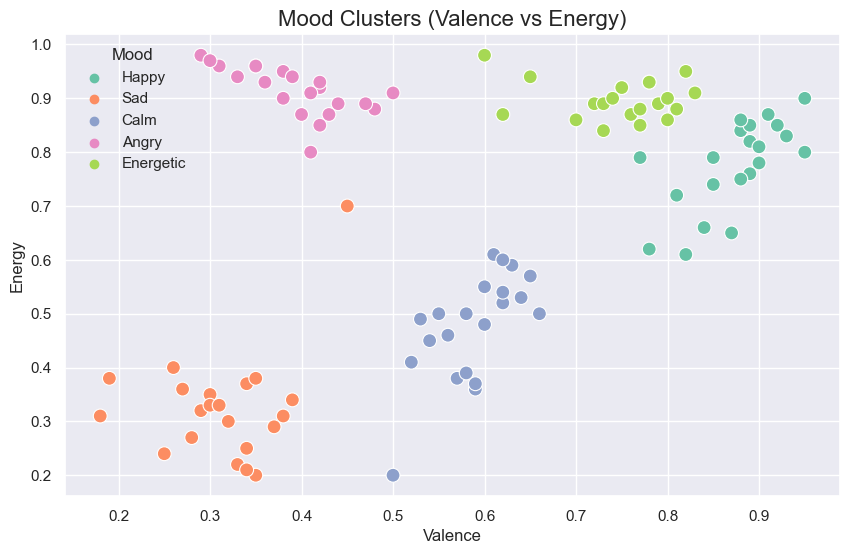

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Valence', y='Energy', hue='Mood', palette='Set2', s=100)

plt.title('Mood Clusters (Valence vs Energy)', fontsize=16)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

In [42]:
plt.savefig("mood_clusters.png")

<Figure size 640x480 with 0 Axes>

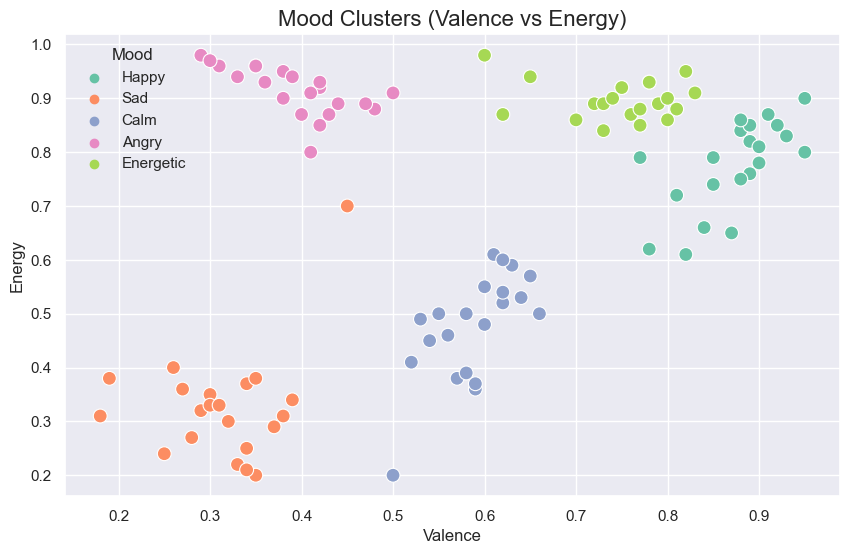

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")  # ✅ Modern style setter

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Valence', y='Energy', hue='Mood', palette='Set2', s=100)

plt.title('Mood Clusters (Valence vs Energy)', fontsize=16)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.grid(True)

plt.savefig("mood_clusters.png")
plt.show()

### Step 4: Build the Streamlit UI

Need to install streamlit using pip.

-----FULL CODE-----

import streamlit as st
import base64
import pandas as pd
import matplotlib.pyplot as plt

---------- PAGE CONFIG ----------

st.set_page_config(page_title="Mood-Based Music Recommender", layout="wide")

---------- BACKGROUND IMAGE SETUP ----------

def add_bg_from_local(image_file):
    with open(image_file, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode()
    page_bg = f"""
    <style>
    .stApp {{
        background-image: url("data:image/jpg;base64,{encoded}");
        background-size: cover;
        background-position: center;
        background-repeat: no-repeat;
        background-attachment: fixed;
    }}
    </style>
    """
    st.markdown(page_bg, unsafe_allow_html=True)

add_bg_from_local("train.jpg")

---------- CREDIT TOP RIGHT ----------

st.markdown(
    """
    <div style='text-align: right; margin-top: 10px; margin-bottom: -40px;'>
        <span style='color: red; font-size: 16px;'></span> 
        <span style='color: white; font-size: 16px;'>By Abisha Jerlin</span>
    </div>
    """,
    unsafe_allow_html=True
)

---------- TITLE + SUBTITLE ----------

st.markdown(
    "<h1 style='text-align: center; color: white;'>Mood-Based Music Recommender</h1>",
    unsafe_allow_html=True
)
st.markdown(
    "<h3 style='text-align: center; color: white;'>Explore songs that match your mood </h3>",
    unsafe_allow_html=True
)
st.markdown("##", unsafe_allow_html=True)

---------- MOOD SELECTION ----------

st.markdown("""
<style>
.mood-label {
    color: white;
    font-size: 20px;
    margin-bottom: -10px;
}
/* FIRST DROPDOWN: white box with black text inside and rounded corners */
div[data-baseweb="select"]:first-of-type {
    background-color: white !important;
    border-radius: 12px !important;
}
div[data-baseweb="select"]:first-of-type * {
    color: black !important;
    background-color: white !important;
}
</style>
<p class="mood-label">What's your current mood?</p>
""", unsafe_allow_html=True)

mood = st.selectbox("", ["Happy", "Sad", "Calm", "Energetic", "Angry"])

---------- PLAYLIST EMBED LINKS ----------

playlist_links = {
    "Happy": "https://open.spotify.com/embed/playlist/1AX6Qra1kWlCEG4fQiElYM?utm_source=generator",
    "Sad": "https://open.spotify.com/embed/playlist/7D4qnXXINGRUSs9z7OPZem?utm_source=generator",
    "Calm": "https://open.spotify.com/embed/playlist/6v6wP4ZhEkvFanwzrqpo36?utm_source=generator",
    "Energetic": "https://open.spotify.com/embed/playlist/3gh5JZzMwUlT4MbTZ88ilg?utm_source=generator",
    "Angry": "https://open.spotify.com/embed/playlist/5MhM8mvoKAGjb0NYEH2npI?utm_source=generator"
}

---------- EMBED THE PLAYLIST ----------

st.markdown(f"<h4 style='color:white;'>Songs that match your <u>{mood}</u> mood</h4>", unsafe_allow_html=True)

st.markdown(
    f"""
    <iframe style="border-radius:12px"  
    src="{playlist_links[mood]}"  
    width="100%" height="400" frameBorder="0" allowfullscreen=""  
    allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"  
    loading="lazy"></iframe>
    """,
    unsafe_allow_html=True
)

---------- MOOD METRICS INFO ----------

st.markdown("""
<style>
.tooltip {
  color: white;
  position: relative;
  display: inline-block;
  cursor: pointer;
  font-size: 16px;
}
.tooltip .tooltiptext {
  visibility: hidden;
  background-color: #333;
  color: white;
  text-align: left;
  border-radius: 6px;
  padding: 10px 15px;
  position: absolute;
  z-index: 1;
  top: 120%;
  left: 0;
  opacity: 0;
  transition: opacity 0.3s;
  white-space: nowrap;
}
.tooltip:hover .tooltiptext {
  visibility: visible;
  opacity: 1;
}
</style>
<div class="tooltip">Mood Metrics Info
  <div class="tooltiptext">
    Valence: How happy or sad a song sounds → High = Cheerful, Low = Melancholic.<br>
    Energy: Intensity of the song → High = Powerful, Low = Calm.
  </div>
</div>
""", unsafe_allow_html=True)

---------- LOAD DATA ----------

df = pd.read_csv("105 songs.csv")

---------- GLOBAL STYLING ----------

st.markdown("""
<style>
.stCheckbox > div > label {
    color: white !important;
}
.row-widget.stCheckbox > label > div {
    color: white !important;
}
.stSelectbox label {
    color: white !important;
}
/* SECOND DROPDOWN: fully black with white text & rounded corners */
div[data-baseweb="select"]:not(:first-of-type) {
    background-color: black !important;
    border-radius: 12px !important;
}
div[data-baseweb="select"]:not(:first-of-type) * {
    color: white !important;
    background-color: black !important;
}
.stApp {
    background-color: #0e0e0e;
}
</style>
""", unsafe_allow_html=True)

---------- CHECKBOX AND UPDATED PLOT ----------

show_mood_checkbox = st.checkbox("Visualizing the feel and flow of music")

if show_mood_checkbox:
    st.markdown("""
    <style>
        div[data-baseweb="select"]:nth-of-type(2) {
            background-color: black !important;
            border-radius: 12px !important;
        }
        div[data-baseweb="select"]:nth-of-type(2) * {
            color: white !important;
            background-color: black !important;
        }
    </style>
    """, unsafe_allow_html=True)

    moods = df["Mood"].unique()
    selected_mood = st.selectbox(
        "",
        options=list(moods),
        index=None,
        placeholder="Select your mood to visualize"
    )

    if selected_mood:
        filtered_df = df[df["Mood"] == selected_mood].reset_index(drop=True)

        plt.style.use("dark_background")
        fig, ax = plt.subplots(figsize=(10, 6))

        # Combined Scatter plot for Valence and Energy
        ax.scatter(filtered_df.index, filtered_df['Valence'], color='skyblue', label='Valence (Happiness)', s=60)
        ax.scatter(filtered_df.index, filtered_df['Energy'], color='orange', label='Energy (Intensity)', s=60)

        ax.set_xlabel("Song Index", color="white")
        ax.set_ylabel("Value", color="white")
        ax.set_title(f"Valence & Energy - {selected_mood} Mood", color="white")
        ax.tick_params(colors='white')
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

        st.pyplot(fig)
